In [1]:
import pandas as pd

In [2]:
import json

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
data_json = json.load(open('covid19-cuba.json'))

In [5]:
diagnosticados = []

for k in range(1, len(data_json['casos']['dias'].keys())+1):
    try:
        diagnosticados += data_json['casos']['dias'][str(k)]['diagnosticados']
    except:
        pass
    


In [6]:
data = pd.DataFrame(diagnosticados)

In [7]:
data.head()

,sexo,provincia_detección,arribo_a_cuba_foco,id,contagio,provincias_visitadas,centro_aislamiento,municipio_detección,pais,dpacode_provincia_deteccion,posible_procedencia_contagio,dpacode_municipio_deteccion,consulta_medico,centro_diagnostico,edad,dpacode_provincias_visitadas,contacto_focal,sujetos_riesgo
0,hombre,Sancti Spíritus,2020/03/10,it-1,importado,"[La Habana, Cienfuegos, Sancti Spíritus]",ipk,Trinidad,it,28,[it],28.06,2020/03/10,ipk,61,[],None,NaN
1,mujer,Sancti Spíritus,2020/03/10,it-2,importado,"[La Habana, Cienfuegos, Sancti Spíritus]",ipk,Trinidad,it,28,[it],28.06,2020/03/10,ipk,57,[],None,NaN
2,mujer,Sancti Spíritus,2020/03/10,it-3,importado,[],ipk,Trinidad,it,28,[it],28.06,2020/03/10,ipk,30,"[La Habana, Cienfuegos, Sancti Spíritus]",5,NaN
3,hombre,Villa Clara,2020/02/24,cu-1,introducido,[],ipk,Santa Clara,cu,26,[it],26.09,2020/03/08,ipk,25,[],None,NaN
4,hombre,La Habana,2020/03/08,cu-2,introducido,[],ipk,Diez de Octubre,cu,23,[es],23.09,2020/03/12,ipk,None,[],None,NaN


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

#### Distribución por edad

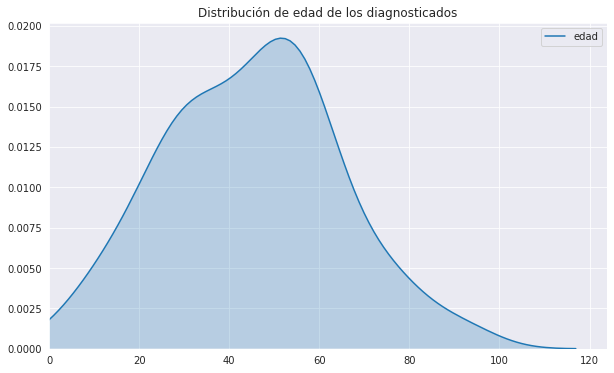

In [9]:
plt.figure(figsize=(10,6))
plt.title("Distribución de edad de los diagnosticados")
sns.kdeplot(data=data['edad'], shade=True).set(xlim=(0))
plt.show()

#### Distribución por género

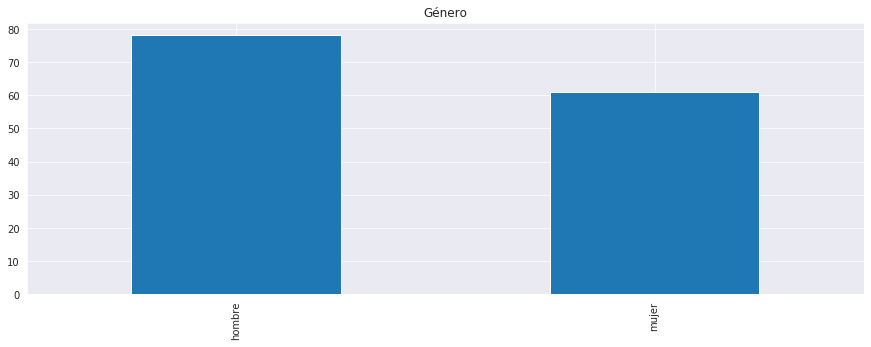

In [10]:
plt.figure(figsize=(15, 5))
plt.title('Género')
data.sexo.value_counts().plot.bar();

#### Distribución por edad y género

In [11]:
male_age = data[data.sexo=='hombre']
female_age = data[data.sexo=='mujer']

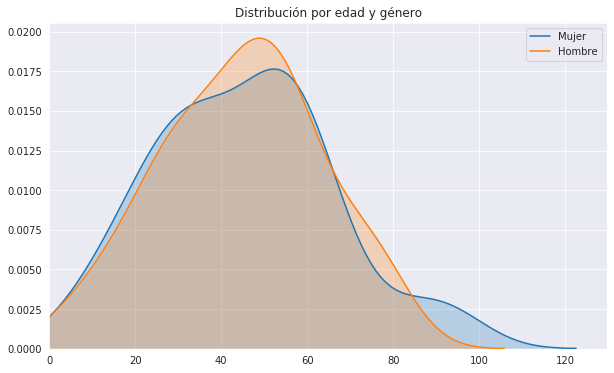

In [12]:
plt.figure(figsize=(10,6))
plt.title("Distribución por edad y género")
sns.kdeplot(data=female_age['edad'], label="Mujer", shade=True).set(xlim=(0))
sns.kdeplot(data=male_age['edad'],label="Hombre", shade=True).set(xlim=(0))
plt.show()

### Cantidad de diagnosticados e ingresados por riesgo

In [13]:
cant_diagnosticados = []
cant_riesgo = []

for k in range(1, len(data_json['casos']['dias'].keys())+1):
    try: 
        cant_diagnosticados.append(len(data_json['casos']['dias'][str(k)]['diagnosticados']))
    except: 
        cant_diagnosticados.append(0)

    try:
        cant_riesgo.append(data_json['casos']['dias'][str(k)]['sujetos_riesgo'])
    except:
        cant_riesgo.append(0)

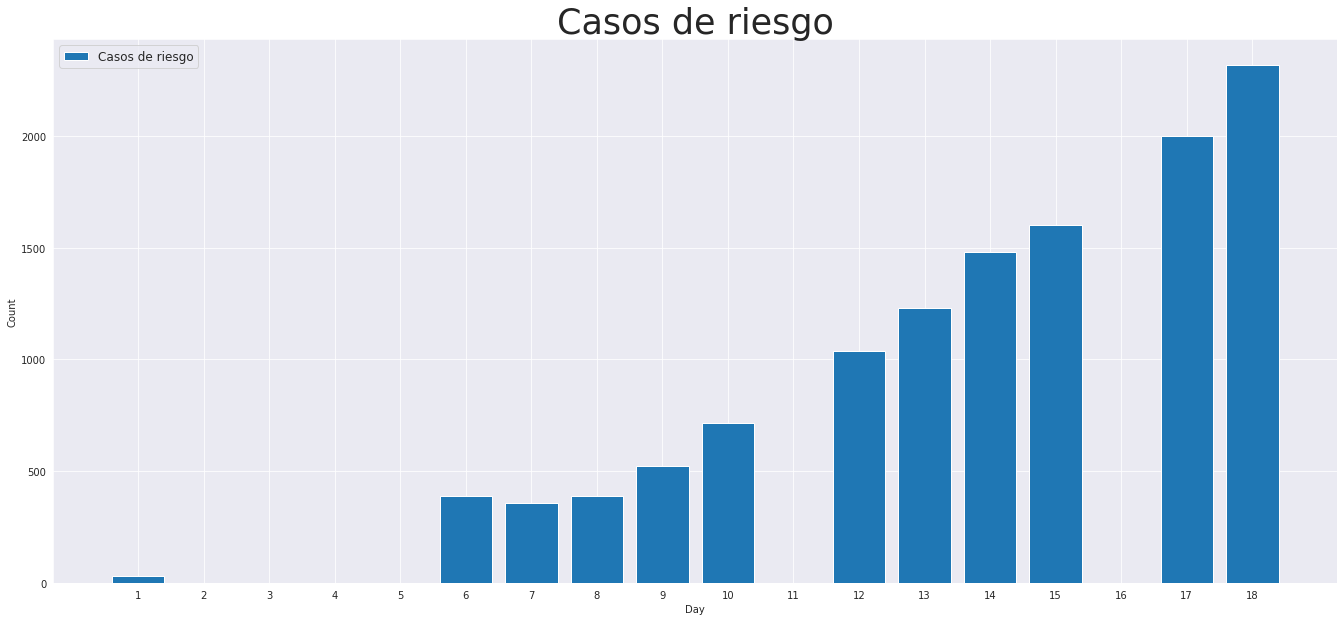

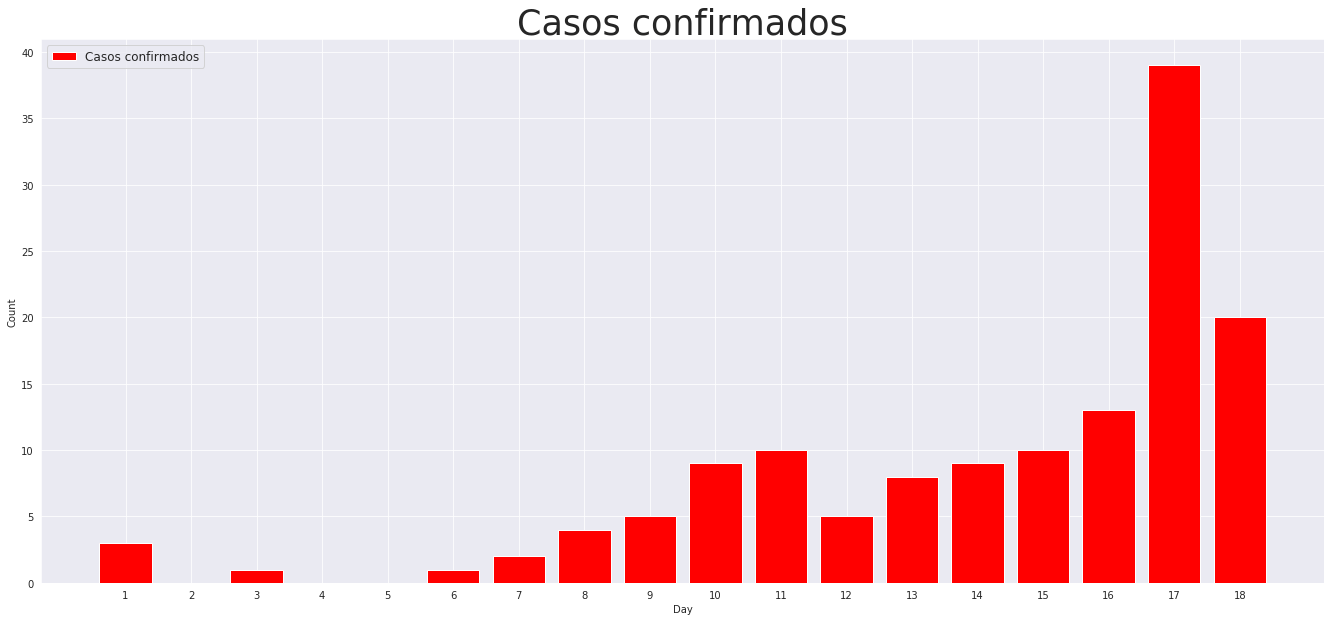

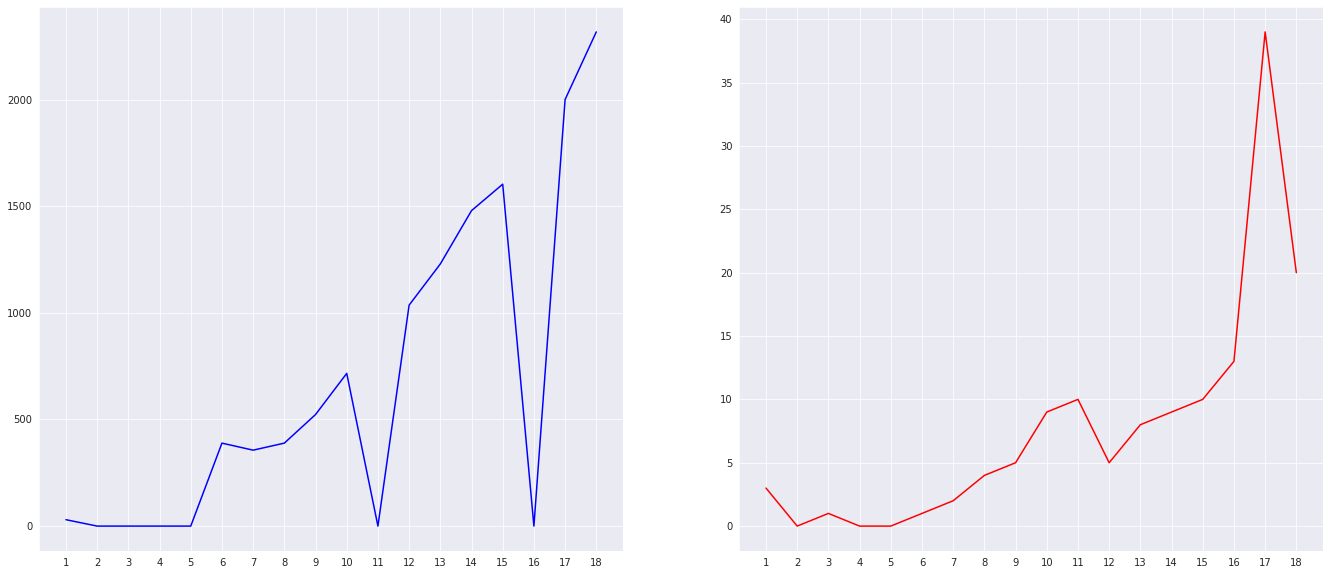

In [14]:
# Casos de riesgo
plt.figure(figsize=(23,10))
plt.bar([str(i) for i in range(1,len(cant_riesgo)+1)], cant_riesgo,label="Casos de riesgo")
plt.xlabel('Day')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Casos de riesgo',fontsize = 35)
plt.show()

# Casos confirmados
plt.figure(figsize=(23,10))
plt.bar([str(i) for i in range(1,len(cant_diagnosticados)+1)], cant_diagnosticados,label="Casos confirmados", color='red')
plt.xlabel('Day')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Casos confirmados',fontsize = 35)
plt.show()

# Plot Compare
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,10))
ax1.plot([str(i) for i in range(1,len(cant_diagnosticados)+1)], cant_riesgo, zorder=1,color="blue")
ax2.plot([str(i) for i in range(1,len(cant_diagnosticados)+1)], cant_diagnosticados, zorder=1,color="red")
plt.show()